In [2]:
# Importo las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Importo los datos
Datos = pd.read_csv('Wine.csv')
# Hago un head de los datos
Datos.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


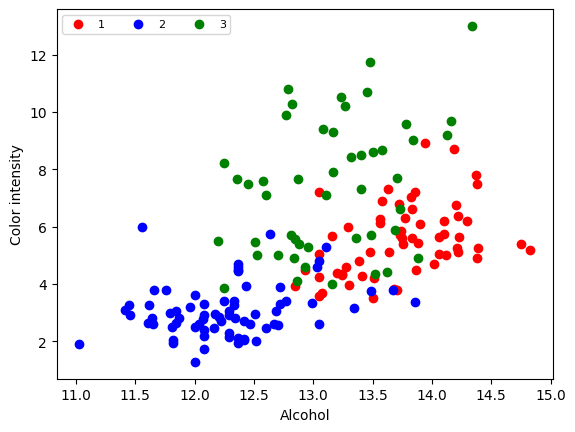

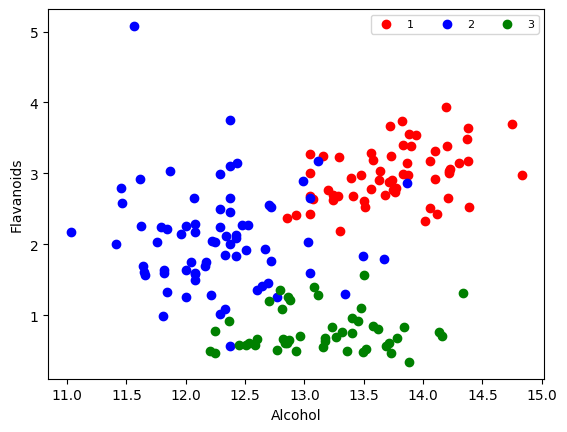

In [3]:
# Visualizo los datos (Opcion 1)
Class_1 =plt.scatter(Datos[Datos["Class"]==1]["Alcohol"], Datos[Datos["Class"]==1]["Color intensity"],c="red")
Class_2 =plt.scatter(Datos[Datos["Class"]==2]["Alcohol"], Datos[Datos["Class"]==2]["Color intensity"],c="blue")
Class_3 =plt.scatter(Datos[Datos["Class"]==3]["Alcohol"], Datos[Datos["Class"]==3]["Color intensity"],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.show()

# Visualizo los datos (Opcion 2)
Class_1 =plt.scatter(Datos[Datos["Class"]==1]["Alcohol"], Datos[Datos["Class"]==1]["Flavanoids"],c="red")
Class_2 =plt.scatter(Datos[Datos["Class"]==2]["Alcohol"], Datos[Datos["Class"]==2]["Flavanoids"],c="blue")
Class_3 =plt.scatter(Datos[Datos["Class"]==3]["Alcohol"], Datos[Datos["Class"]==3]["Flavanoids"],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.show()

In [4]:
# Convirtamos el dataset en X e y
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = Datos["Class"]
# Inicializamos el PCA e imprimimos los componentes principales 
pca = PCA()
pca.fit(X)
print(pca.components_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [ 1.68738094e-02  1.22003373e-01  5.19874304e-02  9.38593003e-01
  -2.97802484e-02 -4.04846439e-02 -8.54433387e-02  1.35107797e-02
  -2.46593824e-02  2.91398464e-01 -2.59776624e-02 -7.03239693e-02
   4.52868159e-03]
 [ 1.41446778e-01  1.60389543e-01 -9.77280992e-03 -3.30965260e-01
  -5.39375605e-03 -7.45846556e-02 -1.69086724e-01  1.08055610e-02
  -5.01209524e-02  8.78893693e-01 -6.00349446e-02 -1.78200254e-01
  -3.11291570e-03]
 [-2.03369773e-02  6.12883454e-01 -2.01755752e-02 -6.43523403e-02
   6.14934472e-03 -3.15245063e-01 -5.24761088e-01  2.96475124e-02


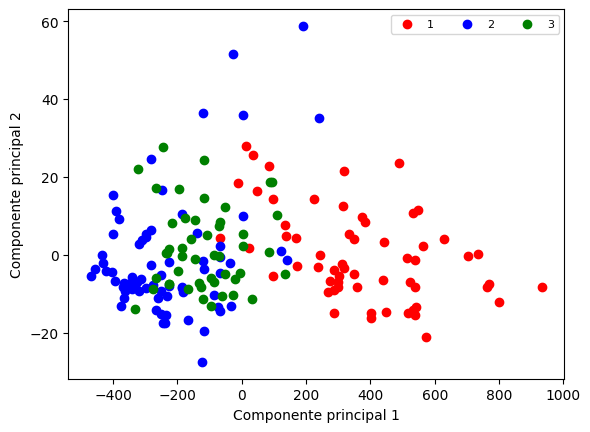

In [5]:
# Hago el nuevo dataset con las variables del PCA
T = pca.transform(X)

# Visualizo los datos (PCA)
Class_1 =plt.scatter(T[y==1][:,0], T[y==1][:,1],c="red")
Class_2 =plt.scatter(T[y==2][:,0], T[y==2][:,1],c="blue")
Class_3 =plt.scatter(T[y==3][:,0], T[y==3][:,1],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

C:\Users\estudiante\AppData\Local\Temp\ipykernel_3116\2854006832.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], pca.components_[0,0]*1000, pca.components_[0,1]*1000, width = 0.05, color="purple")
C:\Users\estudiante\AppData\Local\Temp\ipykernel_3116\2854006832.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], pca.components_[1,0]*1000, pca.components_[1,1]*1000, width = 0.05, color="black")


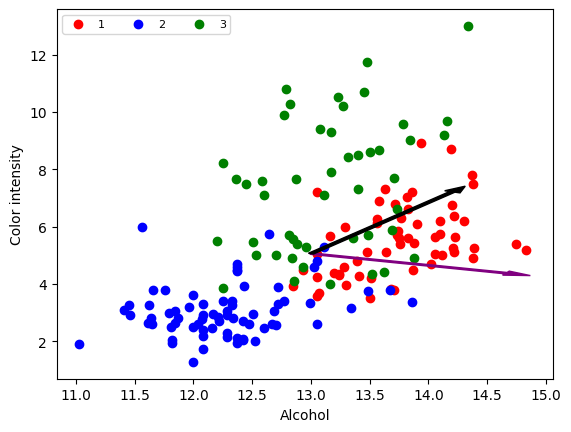

In [6]:
# Visualizo los componentes principales en la primera visualización
Class_1 =plt.scatter(Datos[Datos["Class"]==1]["Alcohol"], Datos[Datos["Class"]==1]["Color intensity"],c="red")
Class_2 =plt.scatter(Datos[Datos["Class"]==2]["Alcohol"], Datos[Datos["Class"]==2]["Color intensity"],c="blue")
Class_3 =plt.scatter(Datos[Datos["Class"]==3]["Alcohol"], Datos[Datos["Class"]==3]["Color intensity"],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], pca.components_[0,0]*1000, pca.components_[0,1]*1000, width = 0.05, color="purple")
plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], pca.components_[1,0]*1000, pca.components_[1,1]*1000, width = 0.05, color="black")
plt.show()

In [7]:
# Miramos que proporción de la varianza aporta cada variable
print(pca.explained_variance_ratio_)
# Vemos que porcentaje explican las 2 principales variables
print((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100)

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]
99.98271461166027


Comprobamos algunas cosas

In [8]:
# PCA con datos centrados y sin centrar da lo mismo (porque se centran los datos de prepo en la clase)
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = Datos["Class"]
# Inicializamos el PCA e imprimimos los componentes principales 
pca = PCA()
pca.fit(X)
Componentes_1 = pca.components_
# Centramos los datos
X = X - X.mean(axis=0)
pca = PCA()
pca.fit(X)
Componentes_2 = pca.components_

for i in range(len(Componentes_1)):
    for j in range(len(Componentes_1[i])):
        print(Componentes_1[i][j],Componentes_2[i][j])

# Hay algunas diferencias numéricas muy pequeñas arrastradas de centrar los datos a mano

0.0016592647196420512 0.0016592647196420733
-0.000681015555500819 -0.0006810155555011521
0.0001949057418915914 0.00019490574189158787
-0.004671300581276238 -0.004671300581276228
0.017868007506895312 0.01786800750689535
0.0009898296800817943 0.0009898296800817932
0.00156728830179306 0.0015672883017930567
-0.00012308666181031297 -0.000123086661810313
0.0006006077918217772 0.0006006077918217761
0.0023271431925767447 0.0023271431925767447
0.0001713800371452348 0.00017138003714523418
0.000704931644591058 0.0007049316445910613
0.9998229365233259 0.9998229365233258
0.0012034061657702345 0.001203406165770958
0.0021549818397452827 0.002154981839743452
0.004593692543405222 0.004593692543405
0.026450393026465485 0.026450393026467
0.999344186062338 0.999344186062338
0.0008779621521441801 0.0008779621521441708
-5.185072836390371e-05 -5.185072836415486e-05
-0.001354478920390782 -0.0013544789203908344
0.005004400402868647 0.005004400402868622
0.015100352998596961 0.015100352998597593
-0.0007626731152

In [9]:
# Los componentes  principales son ortonormales
for i in Componentes_1:
    for j in Componentes_1:
        if np.all(i != j):
            print(np.dot(j,i))

# Nuevamente, vemos que está muy cerca al 0, osea que se aproxima numericamente bien




3.5236570605778894e-18
1.1275702593849246e-17
4.5102810375396984e-17
8.836247705756861e-17
2.671474153004283e-16
-3.655116573991757e-17
-1.1384122811097797e-17
-5.271933063710765e-18
-2.4936649967166602e-18
-5.773376568485311e-18
2.654940069873879e-17
-3.957337929572091e-18
3.5236570605778894e-18
6.938893903907228e-17
-8.847089727481716e-17
1.7889335846010823e-17
1.7564075194265172e-17
2.2768245622195593e-17
-1.8214596497756474e-17
-1.3010426069826053e-17
-7.37257477290143e-18
1.222980050563649e-16
-7.37257477290143e-18
-9.974659986866641e-18
1.1275702593849246e-17
6.938893903907228e-17
3.3306690738754696e-16
9.020562075079397e-17
5.689893001203927e-16
1.6653345369377348e-16
3.469446951953614e-17
-6.938893903907228e-18
1.5265566588595902e-16
9.71445146547012e-17
3.469446951953614e-18
-2.688821387764051e-17
4.5102810375396984e-17
-8.847089727481716e-17
3.3306690738754696e-16
0.0
-2.7755575615628914e-17
1.1102230246251565e-16
1.249000902703301e-16
4.163336342344337e-17
-4.163336342344337

In [10]:
# Comprobamos que el ratio de varianza explicada sea igual a 1
np.sum(pca.explained_variance_ratio_)

# Lo mismo, numéricamente idéntico a 1

np.float64(1.0)

SVD

In [11]:
# Importamos la librería de SVD
from sklearn.decomposition import TruncatedSVD

# Divido el dataset en X e y
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = Datos["Class"]

# Inicializo la clase
svd = TruncatedSVD(n_components=12)
svd.fit(X)
pca = PCA().fit(X)

# Imprimamos los vectores que propone el algoritmo, y comparemoslo con PCA
print(svd.components_[0],pca.components_[0])
print("------------------------------------------")
print(svd.components_[1],pca.components_[1])
print("------------------------------------------")
print(svd.components_[2],pca.components_[2])


[1.49627683e-02 2.54474351e-03 2.70802832e-03 2.13830885e-02
 1.15577596e-01 2.74422127e-03 2.52832530e-03 3.91490065e-04
 1.88971728e-03 6.06975016e-03 1.10917441e-03 3.06051522e-03
 9.92915809e-01] [ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
------------------------------------------
[ 0.11418847  0.02811962  0.0221741   0.22825964  0.9578346   0.01506698
  0.00807653  0.0042725   0.01160975  0.03407616  0.00791544  0.01968623
 -0.11862692] [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]
------------------------------------------
[ 0.26649005  0.11235981  0.06456619  0.90589088 -0.25825116  0.01847803
 -0.01175401  0.01879061  0.00607174  0.15171057  0.009

In [12]:
# Si centramos nuestros datos, SVD será lo mismo que PCA
X = X - X.mean(axis=0)

# Inicializo la clase
svd = TruncatedSVD(n_components=12)
svd.fit(X)
pca = PCA().fit(X)

# Imprimamos los vectores que propone el algoritmo, y comparemoslo con PCA
print(svd.components_[0],pca.components_[0])
print("------------------------------------------")
print(svd.components_[1],pca.components_[1])
print("------------------------------------------")
print(svd.components_[2],pca.components_[2])

[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01] [ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
------------------------------------------
[ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02] [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]
------------------------------------------
[ 0.01687381  0.12200337  0.05198743  0.938593   -0.02978025 -

C:\Users\estudiante\AppData\Local\Temp\ipykernel_3116\284142696.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], svd.components_[0,0]*10, svd.components_[0,1]*10, width = 0.05, color="purple")
C:\Users\estudiante\AppData\Local\Temp\ipykernel_3116\284142696.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], svd.components_[1,0]*10, svd.components_[1,1]*10, width = 0.05, color="black")


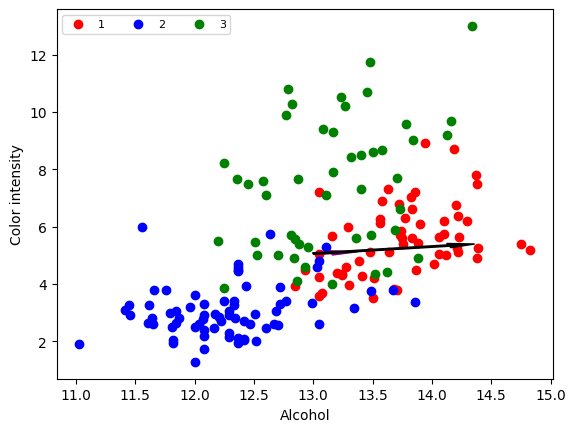

In [13]:
Datos = pd.read_csv('Wine.csv')
# Divido el dataset en X e y
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = Datos["Class"]

# Inicializo la clase
svd = TruncatedSVD(n_components=12)
svd.fit(X)

# Visualizo los componentes principales en la primera visualización
Class_1 =plt.scatter(Datos[Datos["Class"]==1]["Alcohol"], Datos[Datos["Class"]==1]["Color intensity"],c="red")
Class_2 =plt.scatter(Datos[Datos["Class"]==2]["Alcohol"], Datos[Datos["Class"]==2]["Color intensity"],c="blue")
Class_3 =plt.scatter(Datos[Datos["Class"]==3]["Alcohol"], Datos[Datos["Class"]==3]["Color intensity"],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], svd.components_[0,0]*10, svd.components_[0,1]*10, width = 0.05, color="purple")
plt.arrow(X.mean(axis=0)[0],X.mean(axis=0)[9], svd.components_[1,0]*10, svd.components_[1,1]*10, width = 0.05, color="black")
plt.show()

# print(np.dot(svd.components_[0],svd.components_[1]))

Vectores derechos de SVD:
[[ 0.61962948  0.78489445]
 [ 0.78489445 -0.61962948]]
Componentes principales de PCA:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


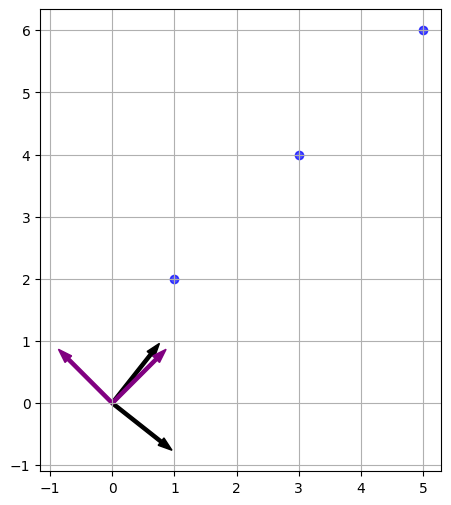

In [14]:
# Datos no centrados
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

svd = TruncatedSVD(n_components=2)
svd.fit(X)

# Aplicando PCA con los datos no centrados
pca = PCA()
pca.fit(X)

# Resultados
print("Vectores derechos de SVD:")
print(svd.components_.T)  # Los vectores derechos de SVD

print("Componentes principales de PCA:")
print(pca.components_.T)  # Los componentes principales de PCA

# Visualización
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], alpha=0.7, color='blue')
plt.gca().set_aspect('equal')  
plt.grid(True)
plt.arrow(0,0, svd.components_[0,0], svd.components_[0,1], width = 0.05, color="black")
plt.arrow(0,0, svd.components_[1,0], svd.components_[1,1], width = 0.05, color="black")
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], width = 0.05, color="purple")
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], width = 0.05, color="purple")
plt.show()

# Naive Bayes Gaussiano

In [15]:
Datos = pd.read_csv('Wine.csv')
# Divido el dataset en X e y
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = Datos["Class"]
# Importo las librerías
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [16]:
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Naive Bayes Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)
   
# Predicción
y_pred = gnb.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy en test es: {accuracy}")

El accuracy en test es: 1.0


In [18]:
# Veamos que los prior se calculan como la frecuencia de cada dato
print(gnb.class_prior_)
print(y_train.value_counts())

[0.32258065 0.40322581 0.27419355]
Class
2    50
1    40
3    34
Name: count, dtype: int64


In [19]:
# Podemos imprimir la media de cada variable por clase
print(gnb.theta_)
# Y también la varianza de cada clase
print(gnb.var_)

[[1.37502500e+01 2.00000000e+00 2.44900000e+00 1.67450000e+01
  1.07750000e+02 2.85225000e+00 2.97950000e+00 3.02250000e-01
  1.91625000e+00 5.44675000e+00 1.06425000e+00 3.16175000e+00
  1.09255000e+03]
 [1.22428000e+01 2.04140000e+00 2.25940000e+00 2.05340000e+01
  9.61600000e+01 2.24100000e+00 2.06920000e+00 3.60400000e-01
  1.68040000e+00 3.08480000e+00 1.05852000e+00 2.80500000e+00
  5.26380000e+02]
 [1.30970588e+01 3.40882353e+00 2.42735294e+00 2.12205882e+01
  9.97352941e+01 1.63970588e+00 7.72647059e-01 4.42647059e-01
  1.08411765e+00 7.19617647e+00 6.90000000e-01 1.63882353e+00
  6.29411765e+02]]
[[2.53619534e-01 4.20272097e-01 5.72210966e-02 7.12756710e+00
  1.10287592e+02 1.34539534e-01 1.67956847e-01 5.57453407e-03
  1.71410534e-01 1.46460403e+00 1.22815341e-02 1.31531534e-01
  4.95403476e+04]
 [3.16944257e-01 1.01896414e+00 9.91377366e-02 1.15943361e+01
  3.46534492e+02 3.38617097e-01 5.30203457e-01 1.69639366e-02
  3.75763937e-01 7.27841057e-01 4.76842262e-02 2.50745097e-

In [20]:
# Podemos imprimir la proba de cada dato
print(gnb.predict_proba(X_test[:10]))

[[9.99994880e-01 5.11985627e-06 6.42760330e-33]
 [9.99999563e-01 4.37161281e-07 1.89052628e-26]
 [8.30191002e-18 1.79036458e-03 9.98209635e-01]
 [1.00000000e+00 4.99340759e-10 3.17066405e-41]
 [6.56464948e-07 9.99999344e-01 7.04895557e-23]
 [1.00000000e+00 1.34177096e-12 1.39939533e-35]
 [2.00966282e-10 1.00000000e+00 1.65899118e-14]
 [3.46879621e-20 2.84799447e-12 1.00000000e+00]
 [1.48349034e-04 9.99851651e-01 5.78491291e-34]
 [6.28418391e-15 3.28566984e-04 9.99671433e-01]]


El accuracy en test es: 0.8518518518518519


c:\Users\estudiante\Desktop\Ejercicios Inferencia\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Color intensity')

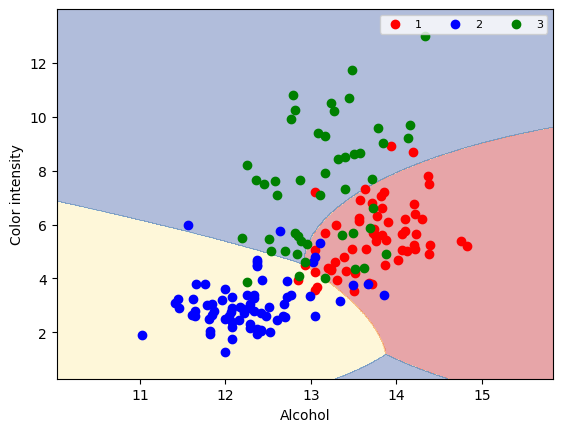

In [21]:
# Uso solo dos variables
X = Datos[['Alcohol','Color intensity']]
y = Datos["Class"]
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Naive Bayes Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)
   
# Predicción
y_pred = gnb.predict(X_test)

# Accuracy en test
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy en test es: {accuracy}")# Visualizo la clasificación
# Creo una malla de puntos para graficar los bordes de decisión
x_min, x_max = X['Alcohol'].min() - 1, X['Alcohol'].max() + 1
y_min, y_max = X["Color intensity"].min() - 1, X["Color intensity"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predecir en toda la malla de puntos
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Class_1 =plt.scatter(Datos[Datos["Class"]==1]["Alcohol"], Datos[Datos["Class"]==1]["Color intensity"],c="red")
Class_2 =plt.scatter(Datos[Datos["Class"]==2]["Alcohol"], Datos[Datos["Class"]==2]["Color intensity"],c="blue")
Class_3 =plt.scatter(Datos[Datos["Class"]==3]["Alcohol"], Datos[Datos["Class"]==3]["Color intensity"],c="green")
plt.legend((Class_1,Class_2,Class_3),
           (1,2,3),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")

# Aplicacion de PCA para ver el porcentaje de varianza

Porcentaje de varianza explicada por cada componente:
Componente 1: 36.20%
Componente 2: 19.21%
Componente 3: 11.12%
Componente 4: 7.07%
Componente 5: 6.56%
Componente 6: 4.94%
Componente 7: 4.24%
Componente 8: 2.68%
Componente 9: 2.22%
Componente 10: 1.93%
Componente 11: 1.74%
Componente 12: 1.30%
Componente 13: 0.80%


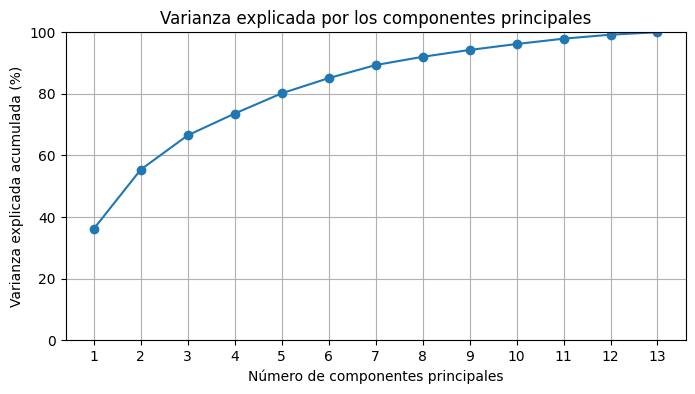

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Selecciona las variables numéricas
X = Datos[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
           'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
           'Proanthocyanins', 'Color intensity', 'Hue',
           'OD280/OD315 of diluted wines', 'Proline']]

# Estandariza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA
pca = PCA()
pca.fit(X_scaled)

# Porcentaje de varianza explicada por cada componente
varianza = pca.explained_variance_ratio_
print("Porcentaje de varianza explicada por cada componente:")
for i, v in enumerate(varianza):
    print(f"Componente {i+1}: {v*100:.2f}%")

# Gráfico de varianza explicada acumulada con eje x comenzando en 1
plt.figure(figsize=(8,4))
plt.plot(range(1, len(varianza)+1), np.cumsum(varianza)*100, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada (%)')
plt.title('Varianza explicada por los componentes principales')
plt.xticks(range(1, len(varianza)+1))  # Opcional: muestra ticks enteros
plt.ylim(0, 100)  # Opcional: limita el eje y de 0 a 100%
plt.grid(True)
plt.show()

# Bayes Ingenuo (datos originales vs componentes con PCA)
Utilizo los primeros componentes principales para Bayes y comparo presición con los datos originales

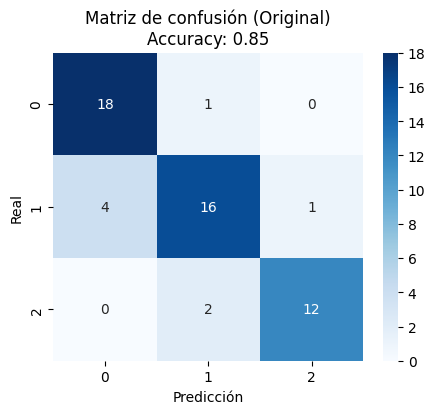

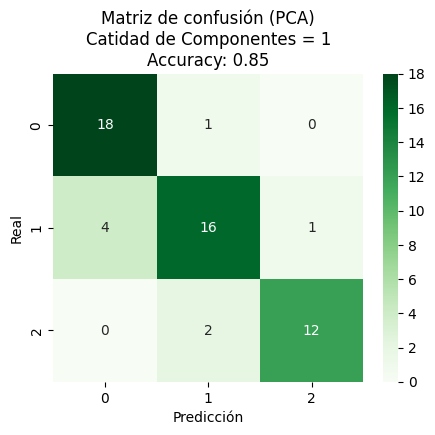

Presición con datos originales: 0.85
Presición con PCA : 0.85


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Datos originales
X = Datos[['Ash']]
y = Datos["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
cm_original = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de confusión (Original)\nAccuracy: {acc_original:.2f}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 2. Datos con PCA (varios componentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=1) # Cantidad de componentes CAMBIAR ACA!!!
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = gnb_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

plt.figure(figsize=(5,4))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Greens")
plt.title(f"Matriz de confusión (PCA)\nCatidad de Componentes = {pca.n_components}\nAccuracy: {acc_pca:.2f}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Comparación de accuracy
print(f"Presición con datos originales: {acc_original:.2f}")
print(f"Presición con PCA : {acc_pca:.2f}")

In [27]:
# Pesos (cargas) de cada variable en cada componente principal
columnas_pca = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']

pesos_componentes = pd.DataFrame(
    data    = pca.components_,
    columns = columnas_pca,
    index   = [f'PC{i+1}' for i in range(pca.n_components_)]
)
print(pesos_componentes)
pesos_componentes

      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PC1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  0.483652    0.224931  0.316069          -0.010591   0.299634   
PC3 -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4 -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5 -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6  0.213539    0.536814  0.154475          -0.100825   0.038144   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
PC1       0.394661    0.422934             -0.298533         0.313429   
PC2       0.065040   -0.003360              0.028779         0.039302   
PC3       0.146179    0.150682              0.170368         0.149454   
PC4       0.198068    0.152295             -0.203301         0.399057   
PC5      -0.149318   -0.109026             -0.500703         0.136860   
PC6      -0.084122   -0.018920             -0.258594        -0.533795   

    

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,0.213539,0.536814,0.154475,-0.100825,0.038144,-0.084122,-0.018920,-0.258594,-0.533795,-0.418644,0.105983,0.265851,0.119726
